<a href="https://colab.research.google.com/github/jpgill86/python-for-neuroscientists/blob/master/notebooks/04-Neuroscience-Packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ATTENTION:** Code cell output is not saved when this notebook saves! This keeps the file size small when large interactive Plotly figures are generated. You can change this setting under *Edit > Notebook settings*.

# Neuroscience Tools

This lesson uses a dataset located in Google Drive, which you can gain access to in one of two ways:

1. Members of the *neuropython* Google Group, which is the mailing list for the course "Introduction to Python for Neuroscientists", are automatically provided access to a shared drive on Google Drive containing the dataset and do not need to do anything. If you are a member, you can [click here to view the shared drive](https://drive.google.com/drive/folders/0AHnaNw5E_AeOUk9PVA). Prospective students may apply for membership to the Google Group from [the course homepage](https://jpgill86.github.io/python-for-neuroscientists/), but note that unsolicited requests will be denied.

2. Non-members can manually add a shortcut to the dataset in their Google Drive by performing the following one-time setup procedure. **Members of the mailing list / Google Group do not need to perform this step**.

## Non-members only: One-time setup to add dataset to Google Drive

To use this notebook, individuals who are not members of the *neuropython* Google Group must first add the dataset to their Google Drive. Follow these steps to do that:

1. Visit this publicly shared Google Drive folder: https://drive.google.com/drive/folders/1L0DBNz7R0ninG2VewKgIQrlwziilSCn0?usp=sharing

2. Along the top of the page, you should see "Shared with me > Gill-Chiel-eNeuro-2020-data". Click on the downward arrow next to the folder name and select "Add shortcut to Drive" from the menu:
> 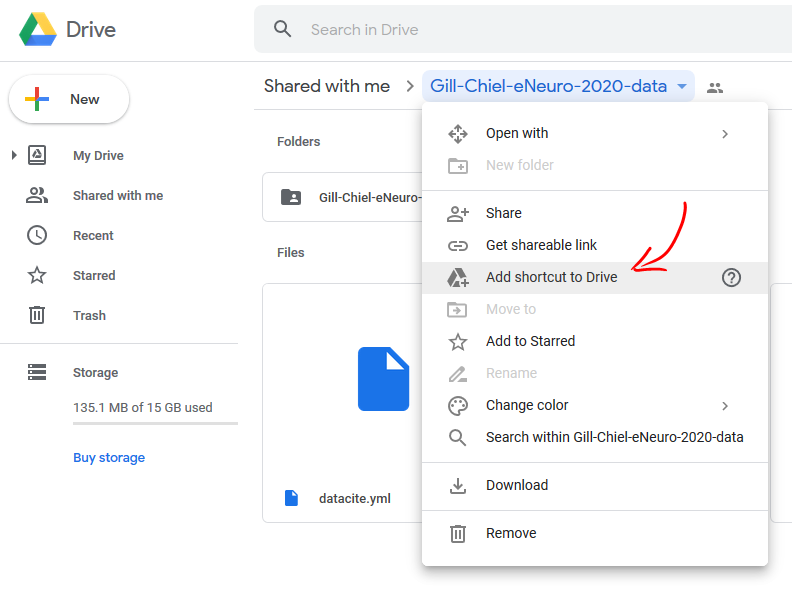

3. Select a location in "My Drive" for adding the shortcut, and then click "Add shortcut":
> 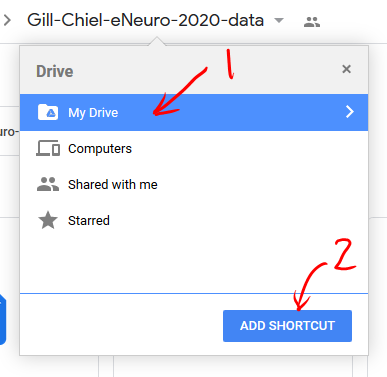

4. You should now see a folder shortcut to "Gill-Chiel-eNeuro-2020-data" in "My Drive". You can check by clicking here: https://drive.google.com/drive/my-drive

5. In the next section of this notebook, where the `data_root` variable is assigned, you will need to change the path to point to wherever you placed the folder shortcut. For example, if you placed the shortcut directly under "My Drive", you should change the assignment to
```python
data_root = "/content/drive/My Drive/Gill-Chiel-eNeuro-2020-data"
```

That's it!

## Mount Google Drive

The following code cell will "mount" (make accessible via a path in the filesystem) your entire Google Drive so that the dataset can be accessed from this notebook. *You should only run code like this in Colab notebooks that you trust, since very malicious things could be done, such as copying or deleting your files!*

To mount Google Drive and make it accessible from this Colab notebook, follow these steps:

1. Run the code cell below. A clickable link will appear, as will a text input field that asks for an authorization code. Click the link, which should open a new browser tab.
2. In the new tab, log into (or select from a list) the appropriate Google account, if necessary.
3. Click "Allow" to grant access to your Google Drive.
4. A code consisting of a long string of random characters will be displayed. Click the button to the right of it to copy the code to the clipboard.
5. Return to this notebook and paste the code into the text box labeled "Enter your authorization code". Finally, press Enter/Return.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Once you have mounted Google Drive, you will not need to repeat the process for this Colab notebook until your session expires, which will occur after an extended period of inactivity, or when selecting *Restart > Factory reset runtime* from the Colab menu.

The next cell specifies where the data folder can be located within your Google Drive. If you are a member of the *neuropython* Google Group (course mailing list), you should not need to make any changes, as the shared drive that all members automatically gain access to contains the files in the correct location. *If you are not a member, you will need to change the path provided below (see previous section).*

Run the cell. If the dataset is located, it should print the contents of the folder (e.g. `README.md`). Otherwise, you will get an error: `ls: cannot access... No such file or directory`. You cannot proceed until you have this right.

In [ ]:
# path must be changed if you are not a member of the neuropython Google Group
data_root = "/content/drive/Shared drives/Introduction to Python for Neuroscientists/Datasets/Gill-Chiel-eNeuro-2020-data"

! ls "$data_root"

## Install Packages

The following command will install a set of tools for working with neuroscience data:
* [*quantities*](https://python-quantities.readthedocs.io): NumPy arrays with physical units
* [*neo*](https://neo.readthedocs.io): object models for neuroscience data (e.g., standardized represenation of spike trains) and readers for many neuroscience file formats
* [*elephant*](https://elephant.readthedocs.io): algorithms for advanced analysis of neuroscience data
* [*neurotic*](https://neurotic.readthedocs.io): dataset organization, automated analysis, and visualization

The `-q` flag tells pip to run in quiet mode, causing it to print a minimal amount of progress reporting. You can remove this flag if you want to see more details.

*Elephant imposes some dependency requirements which are not strictly necessary for many of Elephant's functions to work. If you see an error message about Elephant requiring an older version of Neo, or other errors related to incompatible versions of packages not on this list, it is likely that these can be ignored for the work done in this notebook.*

In [ ]:
! pip install -q quantities neo elephant neurotic

# incompatible version errors should be ignored

## Quantities: NumPy Arrays With Units

The **Quantities** package is useful for science in general because it implements Quantity arrays, which are an extension of NumPy arrays with several useful features. To demonstrate, we will first import the package under the alias `pq`, which is a commonly used convention:

In [ ]:
import quantities as pq

Quantity arrays have physical units, such as seconds or kilograms. These units can be specified as a string when the Quantity is initialized, like this:

In [ ]:
# Method 1 for creating a Quantity array
distances = pq.Quantity([1.1, 2.2, 3.3], 'centimeters')
distances

Notice that the printed representation of the Quantity array is similar to a NumPy array, but the units are shown at the end.

A second way to create a Quantity array is to multiply an ordinary list, tuple, or NumPy array by one of the package's UnitQuantity instances, which are accessed using symbols like `pq.s` or `pq.kg`. For example, the following is equivalent to what is shown above:

In [ ]:
# Method 2 for creating a Quantity array
distances = [1.1, 2.2, 3.3] * pq.cm
distances

The package includes a UnitQuanitity for nearly every common unit you can think of, including variations with metric prefixes:

In [ ]:
print(pq.V)
print(pq.mV)
print(pq.uV)
print()

print(pq.MOhm)
print(pq.kOhm)
print(pq.Ohm)

> Aside: The micro- prefix, normally represented by the Greek letter μ, is represented in the Quantities package with the letter `u` in the input (`pq.uV`) and, by default, in the output (`1 uV (microvolt)`); similarly, the unit of resistance, ohm, is spelled out as `Ohm` or `ohm`, rather than being represented with the Greek letter Ω.
>
> The output representation of these symbols is controlled by a global parameter: `pq.markup.config.use_unicode`. When set to `False` (default), only English letters are used in output; when manually changed to `True` (recommended for presentable results), Greek letters will be used:

In [ ]:
# English letters only in output
pq.markup.config.use_unicode = False
print('With use_unicode = False: (default)')
print(pq.uV)    # uV
print(pq.MOhm)  # megaohm
print()

# allow Greek letters in output
pq.markup.config.use_unicode = True
print('With use_unicode = True:  (recommended)')
print(pq.uV)    # μV
print(pq.MOhm)  # MΩ

If a unit type is not defined by the Quantities package, it is possible to define it yourself. For example, although the package defines newtons for force, it does not define millinewtons, which can be defined this way:

In [ ]:
# define a new unit type
pq.mN = pq.UnitQuantity('millinewton', definition=pq.N/1e3, symbol='mN')
pq.mN

The new unit can then be used in any of these ways:

In [ ]:
print(pq.Quantity([1.1, 2.2, 3.3], 'millinewton'))
print(pq.Quantity([1.1, 2.2, 3.3], 'mN'))
print([1.1, 2.2, 3.3] * pq.mN)

The units of any Quantity array can be accessible via the `units` property, although the printout is not very nice for display:

In [ ]:
distances.units

The units can be written as a nicer string using the `dimensionality` property:

In [ ]:
str(distances.dimensionality)

Quantity arrays can be converted between compatible units using the `rescale()` method:

In [ ]:
print(distances)
print(distances.rescale('mm'))
print(distances.rescale('in'))

Quantity arrays with compatible units can be used together algebraically. The result will have the units of the leading array:

In [ ]:
[1, 2, 3] * pq.cm + [1, 2, 3] * pq.inch

Finally, the values of a Quantity array can be obtained (without their units) using the `magnitude` property, which returns a simple NumPy array:

In [ ]:
distances.magnitude

## Neo: Neuroscience Electrophysiology Objects (and File Readers)

The **Neo** package is designed for working with neuroscience data. It implements specialized classes for representing common data objects, such as time series data containing voltage samples or lists of times when spikes occurred. Most Neo objects are built out of Quantity arrays, so they are "aware" of physical units.

Furthermore, Neo provides the tools necessary for reading data from a variety of file formats commonly used in neuroscience. These readers import the data into Neo's classes, providing a common object model for neuroscience data, regardless of its source.

We begin by importing Neo:

In [ ]:
import neo

We will demonstrate some of Neo's capabilities by first importing some real data. The mounted Google Drive folder contains several AxoGraph files, which is one of many file formats that Neo understands. We will start by constructing a string containing the path to one data file:

In [ ]:
data_file = data_root + '/Gill-Chiel-eNeuro-2020-data/Animal 4 Loaded 2 Superset/Animal 4 Loaded 2 Superset.axgx'
print(data_file)

The following cell will use Neo's AxographIO reader to read the data file's contents into a variable called `blk`, which is short for "block". The optional parameter `signal_group_mode='split-all'` ensures that all signal channels are imported into separate Neo objects, which can be more convenient to work with.

In [ ]:
blk = neo.AxographIO(data_file).read_block(signal_group_mode='split-all')

`blk` is a Neo Block object, which is a container for other Neo objects.

> 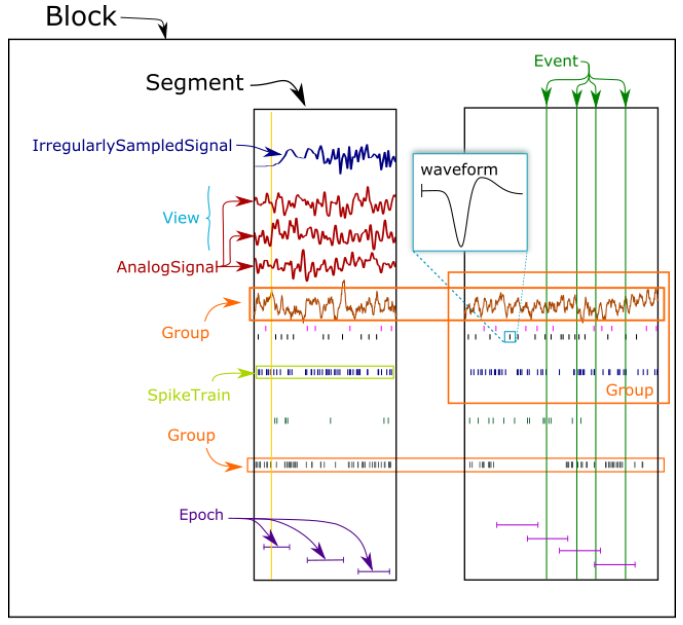<br/>
Source: https://neo.readthedocs.io/en/stable/core.html

The Block represents the entire data file. Typing `blk` by itself will cause a summary of its contents to be displayed.

In [ ]:
blk

This printout shows that the Block contains 1 Neo **Segment**, which is another type of container that holds data that *share the same timebase* (e.g., raw signals and spike trains that share a common clock). An AxoGraph file recorded in continuous acquisition (chart) mode, such as this one, will contain just one Segment because the clock was never "reset" during the recording; in contrast, when recorded in episodic acquisition (protocol) mode, a file will contain one Segment for each episode/trial, each with its own indepenent timebase.

The printout also shows that the Segment contains 5 **AnalogSignals**, 1 **Epoch**, and 1 **Event**, all of which are types of Neo objects that extend Quantity arrays.

A list of AnalogSignals contained within the first (and only) Segment can be accessed in the following way; a summary description is displayed for each AnalogSignal, rather than its raw values:

In [ ]:
blk.segments[0].analogsignals

These AnalogSignals contain the raw recordings obtained during the experiment. Each AnalogSignal has a name, accessible via the `name` property. The names of all of the signals can be displayed easily using a list comprehension:

In [ ]:
[sig.name for sig in blk.segments[0].analogsignals]

The order of the signals in the list depends on how AxoGraph was configured during the experiment.

I find it is inconvenient to have to remember this order, which may change from one file to the next. It would be much more convenient to access signals by name. We can do this with a dictionary comprehension, assuming all names are unique within the file:

In [ ]:
sigs = {sig.name: sig for sig in blk.segments[0].analogsignals}

Now we can use the dictionary `sigs` to access an AnalogSignal by name:

In [ ]:
sigs['BN2']

Each AnalogSignal is essentially a Quantity array augmented with very useful methods and metadata. They inherit all of the useful properties of generic NumPy arrays and Quantity arrays while adding functionality specific to neuroscience applications.

To demonstrate these relationships, we can reduce an AnalogSignal to a simpler Quantity array using the `as_quantity()` method:

In [ ]:
sigs['BN2'].as_quantity()

As with ordinary Quantity arrays, the units of an AnalogSignal can be checked with the `units` property or converted using the `rescale()` method:

In [ ]:
sigs['BN2'].rescale('uV')

If you want to both convert to a Quantity array and rescale the units, you can chain methods together (in either order):

In [ ]:
sigs['BN2'].as_quantity().rescale('uV')

The `as_array()` method of AnalogSignals simplifies the object even further, to a unitless NumPy array, and it allows you to convert units first by passing an optional parameter:

In [ ]:
# equivalent to sigs['BN2'].rescale('uV').magnitude
sigs['BN2'].as_array('uV')

Notice that because this is a NumPy array, not a Quantity, the units are missing from the end of the printout.

The primary reasons for converting an AnalogSignal to a Quantity array using `as_quantity()` or to a NumPy array using `as_array()` or `magnitude` is for printing the actual values (rather than the summary description) or for use in code where there is type incompability (such as when plotting with Matplotlib).

The times associated with each sample in an AnalogSignal can be retrieved as a Quantity array using the `times` property:

In [ ]:
sigs['BN2'].times

AnalogSignals have several other important properties related to time, such as the sampling frequency:

In [ ]:
sig = sigs['BN2']

print('t_start:           ', sig.t_start)
print('t_stop:            ', sig.t_stop)
print('duration:          ', sig.duration.rescale('s'))
print('sampling_rate:     ', sig.sampling_rate)
print('sampling_period:   ', sig.sampling_period.rescale('ms'))

AnalogSignals have a `time_slice()` method which returns a smaller AnalogSignal in which data points before a new start time and/or after a new stop time are dropped (if one parameter is `None`, nothing will be clipped from that end of the signal):

In [ ]:
sigs['BN2'].time_slice(3000*pq.s, 3001*pq.s)

Attributes specific to AnalogSignals, such as the `time_slice()` method, are lost if an AnalogSignal is first reduced to a simpler Quantity or NumPy array lacking those attributes (e.g., `sig.as_quantity().time_slice(...)` will not work).

In summary, AnalogSignals extend Quantity arrays which extend NumPy arrays, and each extension adds features. AnalogSignals inherit all of the properties and methods of both Quantity and NumPy arrays. Here are some examples:

In [ ]:
sig = sigs['BN2']

print('Properties from AnalogSignal class')
print('name:              ', sig.name)
print('times:             ', sig.times)
print('t_start:           ', sig.t_start)
print('t_stop:            ', sig.t_stop)
print('duration:          ', sig.duration.rescale('s'))
print('sampling_rate:     ', sig.sampling_rate)
print('sampling_period:   ', sig.sampling_period.rescale('ms'))
print('as_quantity()')
print('as_array()')
print()

print('Properties from Quantity array class')
print('units:             ', sig.units)
print('dimensionality:    ', sig.dimensionality)
print('rescale()')
print()

print('Properties from NumPy array class')
print('dtype:             ', sig.dtype)
print('shape (rows, cols):', sig.shape, ' <-- len(sig) returns number of rows =', len(sig))
print('size (rows x cols):', sig.size)

## Plotting Raw Signals

Using the values stored in AnalogSignals, along with their `times`, we can generate plots.

The **Matplotlib** package can be used to make fast, non-interactive plots. First, let's import it in the usual way:

In [ ]:
import matplotlib.pyplot as plt

The following code plots the entire buccal nerve 2 (BN2) AnalogSignal after converting it from volts to microvolts. Notice that `as_quantity()` is used because Matplotlib fails when working with AnalogSignals directly. Also, `x.dimensionality` and `y.dimensionality` are used to automatically display the correct units on the axes labels.

In [ ]:
sig = sigs['BN2']
new_units = 'uV'

x = sig.times
y = sig.as_quantity().rescale(new_units)

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(x, y)
ax.set_xlabel(f'Time ({x.dimensionality})')
ax.set_ylabel(f'{sig.name} ({y.dimensionality})')

ax.grid()
fig.tight_layout()
fig.show()

A completely independent plotting library, called **Plotly**, can make interactive plots in Colab that allow for zooming, panning, and point measurements. It provides a great user experience, so we will use Plotly throughout the rest of this notebook. However, the interactive plots take much longer to load for data sets of this size and can cause the notebook file size to become very large if the output cells containing the interactive plots are saved, so the saving of output cells has been disabled for this notebook. You can change this setting under *Edit > Notebook settings*.

Let's plot the same signal again using Plotly. First, let's import the package (and change the default style):

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = 'plotly_white'

Plotly works with regularly sampled data most efficiently if, instead of providing the whole `times` array for the x-values, we simply provide a starting x-value (`x0`) and the interval between x-values (`dx`). These are accessible as `sig.t_start` and `sig.sampling_period`, respectively. Otherwise, the following Plotly code is quite similar to the Matplotlib code above.

In [ ]:
sig = sigs['BN2']
new_units = 'uV'

x0 = float(sig.t_start)
dx = float(sig.sampling_period)
y = sig.rescale(new_units).flatten()

fig = make_subplots()

fig.add_scatter(x0=x0, dx=dx, y=y)
fig.update_layout(
    xaxis_title=f'Time ({sig.times.dimensionality})',
    yaxis_title=f'{sig.name} ({y.dimensionality})')

fig.show()

Let's try plotting together several simultaneously recorded AnalogSignals. We will define a function that iterates over a list or dictionary of AnalogSignals to generate a multi-panel plot:

In [ ]:
def plot_signals(sigs, new_units={}, t_start=None, t_stop=None, fig_height=None, fig=None):

    # ensure sigs is an iterable of single-channel AnalogSignals
    if isinstance(sigs, neo.AnalogSignal):
        sigs = [sigs]
    elif isinstance(sigs, dict):
        sigs = sigs.values()
    for sig in sigs:
        if not isinstance(sig, neo.AnalogSignal):
            raise ValueError(f'non-AnalogSignal found in sigs: {sig}')
        elif sig.shape[1] != 1:
            raise ValueError(f'AnalogSignal must be single-channel: {sig}')

    # ensire new_units is a dictionary
    if isinstance(new_units, str):
        # plan to use this one unit type for all signals
        new_units = {sig.name: new_units for sig in sigs}
    elif not isinstance(new_units, dict):
        raise ValueError(f'new_units must either be a string or dict: {new_units}')

    # generate an empty multi-panel Plotly figure object
    # - rows determines the number of vertically stacked panels
    # - shared_xaxes ensures that panning and zooming in time in one panel
    #   updates all
    if fig is None:
        fig = make_subplots(rows=len(sigs), shared_xaxes=True)

    # iterate over all AnalogSignals
    for i, sig in enumerate(sigs):

        # AnalogSignal.time_slice() extracts the section of the signal between
        # t_start and t_stop
        # - if t_start or t_stop is None, time_slice will not clip the
        #   beginning or end of the signal, respectively
        sig = sig.time_slice(t_start, t_stop)

        # when creating a scatter or line plot using Plotly with regularly
        # sampled points, rather than passing an array of x-values (like
        # sig.times) it is more effecient to pass a starting x-value (x0) and
        # the spacing between x-values (dx)
        # - float() converts these Quantities to simple floating point numbers,
        #   since Plotly sometimes struggles with Quantity objects
        x0 = float(sig.t_start)
        dx = float(sig.sampling_period)

        # obtain y-values by rescaling to new units if any were provided
        # (otherwise convert to current units, which does nothing) and
        # flattening the N-by-1 matrix (technically 2-dimensional) into a
        # 1-dimensional vector
        y = sig.rescale(new_units.get(sig.name, sig.units)).flatten()

        # plot the data in the current figure panel
        fig.add_scatter(x0=x0, dx=dx, y=y, name=sig.name, row=i+1, col=1)

        # update the y-axis label in the current figure panel
        fig.update_yaxes(title_text=f'{sig.name} ({y.dimensionality})', row=i+1)

    # update last x-axis label
    fig.update_xaxes(title_text=f'Time ({sig.times.dimensionality})', row=len(sigs))

    # remove the unnecessary legend and adjust the height of the entire figure
    fig.update_layout(showlegend=False, height=fig_height)

    return fig

With our function defined, let's run it:

In [ ]:
sigs = {sig.name: sig for sig in blk.segments[0].analogsignals}
new_units = {'I2': 'uV', 'RN': 'uV', 'BN2': 'uV', 'BN3-DIST': 'uV', 'Force': 'mN'}
t_start, t_stop = [2897, 2937] * pq.s

plot_signals(sigs, new_units, t_start, t_stop, fig_height=700)

A limitation of using Plotly with Colab is the amount of data that can be plotted in a single figure inside the notebook. Instead of generating a static image like Matplotlib or Seaborn does, Plotly generates HTML and JavaScript that provide an interactive experience in the browser. This requires that the numeric value of every data point is contained within the result, and that result has to be transmitted through the internet from Google's Colab servers, where it is generated, to your computer, where your browser allows you to interact with it.

Colab seems to enforce a data transfer limit of some tens of megabytes, and any Plotly figure greater than this will result in "Runtime disconnected". The limit is not very difficult to reach, as the data is uncompressed (albeit at greatly reduced precision). For floating point numbers, a few million data points is enough to reach this limit; this is on the order of 10 minutes of data from a single channel recorded at 5000 Hz, or 2 minutes from 5 channels at the same sampling frequency, or just 20 seconds from 16 channels recorded at 10 kHz.

Static plots generated by Matplotlib or Seaborn do not have this limitation as only the final raster image needs to be transfered over the internet.

If you don't mind viewing your Plotly figure outside of your online Colab notebook, you can assign it to a variable, rather than display it, and save it to a file using the `write_html()` method. You can then download the file to your computer using Colab's file browser and view it locally. Distributing the downloaded file is also a convenient way to share individual interactive figures with others without them needing to run your Colab notebook or have direct access to the data files.

To try this, run the following code, which plots the entire 164-second recording, rather than a short 40-second slice like the previous example. Then, download `plotly-figure.html` (46 MB) from the "Files" tab on the left edge of the page and open it on your computer.

In [ ]:
sigs = {sig.name: sig for sig in blk.segments[0].analogsignals}
new_units = {'I2': 'uV', 'RN': 'uV', 'BN2': 'uV', 'BN3-DIST': 'uV', 'Force': 'mN'}

fig = plot_signals(sigs, new_units, fig_height=700)
fig.write_html('plotly-figure.html')

## Elephant: Electrophysiology Analysis Toolkit

The **Elephant** package provides a suite of powerful tools and algorithms designed to work with Neo objects.

To begin, let's import the package:

In [ ]:
import elephant

The function `elephant.signal_processing.butter()` can apply a high-pass, low-pass, or band-pass Butterworth filter to an AnalogSignal. These filters can be used to remove noise or motion artifacts.

In the following example, a low-pass filter with a cut-off of 10 Hz is applied to a force transducer recording to remove high-frequency electronic noise. Both the original and filtered versions are plotted for comparison.

In [ ]:
sig = sigs['Force']
new_units = 'mN'
t_start, t_stop = [2890, 2910] * pq.s
lowpass_frequency = 10 * pq.Hz

sig_filtered = elephant.signal_processing.butter(sig, lowpass_frequency=lowpass_frequency)
sig_filtered.name = f'Force (low-pass filtered @ {lowpass_frequency})'

fig = plot_signals(sig, new_units, t_start, t_stop)
fig = plot_signals(sig_filtered, new_units, t_start, t_stop, fig=fig)
fig.update_yaxes(title_text=f'{sig.name} ({new_units})')
fig.update_layout(showlegend=True)
fig

Another important tool provided by Elephant is the `elephant.spike_train_generation.peak_detection()` function. It takes as inputs an AnalogSignal and some amplitude threshold, and it returns a Neo SpikeTrain object, which is a list of times when peaks were detected. Like AnalogSignals, SpikeTrains are Quantity arrays with added features. In general, Neo SpikeTrains can contain much more information than just the times when spikes occurred, such as waveforms corresponding to each spike, but here we will focus on timing. Peaks above the threshold are detected by default, but the `sign` parameter can change this behavior. In the following example, peaks below the threshold (troughs) are stored in `spiketrain`:

In [ ]:
sig = sigs['BN2']
threshold = -25 * pq.uV
sign = 'below'

# detect spikes above or below threshold in the AnalogSignal
spiketrain = elephant.spike_train_generation.peak_detection(sig, threshold=threshold, sign=sign)

# display the first 5 spike times
spiketrain.times[:5]

The SpikeTrain object returned by `elephant.spike_train_generation.peak_detection()` stores the times of spikes but not their amplitudes. The following function can find those amplitudes for us:

In [ ]:
def get_amplitudes(sig, spiketrain):
    return sig.as_quantity()[sig.time_index(spiketrain)]

In [ ]:
# display the first 5 spike amplitudes
get_amplitudes(sig, spiketrain).rescale('uV')[:5]

Now we can add markers to a plot of the signal for each detected spike, and we can indicate the threshold with a dotted line:

In [ ]:
sig = sigs['BN2']
new_units = 'uV'
threshold = -25 * pq.uV
unit_name = 'B3 neuron'

# plot the AnalogSignal as a trace
fig = plot_signals(sig, new_units)

# detect spikes above or below threshold in the AnalogSignal and plot their peaks
sign = 'above' if threshold >= 0 else 'below'
x = elephant.spike_train_generation.peak_detection(sig, threshold=threshold, sign=sign)
y = get_amplitudes(sig, x).rescale(new_units).flatten()
fig.add_scatter(x=x, y=y, mode='markers', name=unit_name)

# add a dotted line indicating the threshold
fig.add_shape(
    type='line',
    x0=0,
    x1=1,
    xref='paper',
    y0=threshold.rescale(new_units).magnitude,
    y1=threshold.rescale(new_units).magnitude,
    yref='y',
    line_dash='dot',
    line_color='red',
)

# add axes labels
fig.update_layout(
    xaxis_title=f'Time ({sig.times.dimensionality})',
    yaxis_title=f'{sig.name} ({y.dimensionality})')

fig.show()

Elephant can also compute rectified area under the curve (RAUC) and derivatives for AnalogSignals, inter-spike intervals and smooth instantaneous firing frequency estimates from SpikeTrains, extract waveforms for detected peaks, and much more.

## neurotic: Neuroscience Tool for Interactive Characterization

The ***neurotic*** package combines Neo and Elephant to perform some semi-automated tasks for you, such as reading data files and detecting spikes with a single command. Using a standardized method of listing parameters in a simple text file, such as file names and spikes detection thresholds, *neurotic* makes it (comparatively!) easy to generate reproducible analyses using a succinct specification, even for individuals who do not know how to program.

*neurotic* has two primary modes of use:
* As an application with a graphical user interface (GUI) that allows you to visualize and interact with data. This mode requires that *neurotic* is installed on your personal computer, rather than running in the cloud on Colab's servers, so we will not use the application here.
* As an importable Python library with classes and functions that perform the data import and processing steps according to the specifications given in the text file.

The contents of these text files are referred to in *neurotic* as **metadata** and are written in a format called YAML. Any basic Python data type, including nested dictionaries and lists, can be represented in YAML. The following example shows how a list of dictionaries could be written down in a YAML file:

In [ ]:
species_dicts = [
 {'common':  'California sea hare',
  'genus':   'Aplysia',
  'species': 'californica',
  'year':    1863},
 {'common':  'Giant kelp',
  'genus':   'Macrocystis',
  'species': 'pyrifera',
  'year':    1820},
 {'common':  'Blueband hermit crab',
  'genus':   'Pagurus',
  'species': 'samuelis',
  'year':    1857}
]

import yaml
print(yaml.dump(species_dicts, default_flow_style=False))

If the output of the cell above was copied into a text file, it could be read back into Python using `yaml.safe_load()` to reconstruct the original dictionary. The advantage of YAML over other serialization standards such as JSON is that it minimizes the use of markup such as quotation marks, brackets, and braces, which makes it fairly succinct to write (at the expense of requiring that white space and other punctuation is exactly right!).

*neurotic*'s metadata specification is outlined in the documentation here: [Configuring Metadata](https://neurotic.readthedocs.io/en/latest/metadata.html). To demonstate a simple example, let's first import the package:

In [ ]:
import neurotic

Next, we will construct a dictionary containing certain keys that specify the path to a data file that can be read by Neo, a set of parameters needed for performing spike detection, and a set of parameters for signal filtering:

In [ ]:
metadata = {
    'data_file': data_file,
    'amplitude_discriminators': [
        {'name': 'B3', 'channel': 'BN2', 'amplitude': [-60, -25], 'units': 'uV'},
    ],
    'filters': [
        {'channel': 'Force', 'lowpass': 10}
    ],
}

This dictionary could have been stored in a text file using the YAML specification, but *neurotic* can also work with metadata stored in memory.

We can now use *neurotic*'s `load_dataset()` function with `metadata`:

In [ ]:
blk = neurotic.load_dataset(metadata)

`load_dataset()` reads the AxoGraph file using Neo, applies a low-pass filter to the force recording, and then detects spikes on the BN2 record. All of these results are stored in the Neo Block `blk`. A list of the AnalogSignals can be accessed using the syntax previously described (`blk.segments[0].analogsignals`); a list of detected spikes, stored as SpikeTrains, is stored as `blk.segments[0].spiketrains`:

In [ ]:
spiketrain = blk.segments[0].spiketrains[0]
print(spiketrain.name)
spiketrain.times[:5]

*neurotic*'s metadata format allows multiple, independent parameter sets to be listed in a single YAML file. This allows the paths to several data files and the instructions for analyzing them to be managed in one place. The dataset located in the mounted Google Drive folder includes such a metadata file:

In [ ]:
metadata_file = data_root + '/Gill-Chiel-eNeuro-2020-metadata.yml'

If you would like to inspect the metadata file, you can run the following command to copy it to the working directory, open the Files tab using the icon on the left edge of the page, and double clicking the file `Gill-Chiel-eNeuro-2020-metadata.yml`. Note that this metadata file uses many advanced tricks for symbolically replicating parameters across datasets, and it includes many parameters that are relevant only to *neurotic* application mode, so it will appear quite complicated! Don't worry if you don't understand all of it.

In [ ]:
! cp "$metadata_file" .

Using *neurotic*'s `MetadataSelector` class, we can construct an object that reads this metadata file and allows us to toggle between the files several datasets:

In [ ]:
metadata = neurotic.MetadataSelector(file=metadata_file)

A list of the available datasets contained within the metadata file can be obtained from the `keys` attribute:

In [ ]:
metadata.keys

The `select()` method allows us to select one of the datasets as the "active" dataset. Let's select the dataset used earlier in this notebook.

In [ ]:
metadata.select('Animal 4 Loaded 2 Superset')

You can display the dictionary that constitutes this dataset's metadata using `selected_metadata`. Notice that, along many other things, it includes details about the path to the AxoGraph file and a set of six "amplitude discriminators" for detecting six sets of spikes.

In [ ]:
metadata.selected_metadata

You can read more about what all these details mean in the [documentation](https://neurotic.readthedocs.io/en/latest/metadata.html).

Only after having called the `select()` method on the `MetadataSelector` object, we can use it with `load_dataset()` to read in the AxoGraph file and perform all of the pre-processing defined by the metadata. Let's put everything in one cell for convenience:

In [ ]:
metadata_file = data_root + '/Gill-Chiel-eNeuro-2020-metadata.yml'
metadata = neurotic.MetadataSelector(file=metadata_file)
metadata.select('Animal 4 Loaded 2 Superset')
blk = neurotic.load_dataset(metadata)

The result includes six SpikeTrains, one for each amplitude discriminator defined in the metadata:

In [ ]:
for st in blk.segments[0].spiketrains:
    print(f'{st.name}: detected {len(st)} spikes')

Let's plot a short section of the dataset with the detected spikes:

In [ ]:
sigs = {sig.name: sig for sig in blk.segments[0].analogsignals}
new_units = {'I2': 'uV', 'RN': 'uV', 'BN2': 'uV', 'BN3-DIST': 'uV', 'Force': 'mN'}
t_start, t_stop = [2977.3, 2984.5] * pq.s

# plot signals
fig = plot_signals(sigs, new_units, t_start, t_stop, fig_height=700)

# plot spikes
for st in blk.segments[0].spiketrains:
    channel = st.annotations['channels'][0]
    sig = sigs[channel]
    row = list(sigs.keys()).index(channel) + 1
    x = st.time_slice(t_start, t_stop)
    y = get_amplitudes(sig, x).rescale(new_units.get(channel, sig.units)).flatten()
    fig.add_scatter(x=x, y=y, mode='markers', name=st.name, row=row, col=1)

fig.update_layout(showlegend=True)
fig.show()

This should give you a sense of how *neurotic* could be used as part of an analysis pipeline:

1. In the standalone application, you can create Neo Epochs (labeled intervals of time) that are later imported into a Python session with `load_dataset()` and stored in `blk.segments[0].epochs`.
2. Using Python code, you could iterate over AnalogSignals, SpikeTrains, and Epochs to perform some analysis, such as measuring the mean firing frequency of a neuron within a designated interval of time. Results could be organized in a Pandas DataFrame.
3. Using Matplotlib or Plotly, you could generate figures that display the results. Using other libraries, you could perform statistical tests on the data.

For a detailed example of a published analysis using the datasets in the mounted Google Drive folder, [see this GitHub repository](https://github.com/CWRUChielLab/Gill-Chiel-eNeuro-2020-code).

# Return to Home

This concludes the Introduction to Python for Neuroscientists! You can return to the home page here:

https://jpgill86.github.io/python-for-neuroscientists/

# External Resources

Package documentation:
* [Quantities](https://python-quantities.readthedocs.io)
* [Neo](https://neo.readthedocs.io)
* [Elephant](https://elephant.readthedocs.io)
* [*neurotic*](https://neurotic.readthedocs.io)
    * [Configuring *neurotic* metadata](https://neurotic.readthedocs.io/en/latest/metadata.html)

# License

[This work](https://github.com/jpgill86/python-for-neuroscientists) is licensed under a [Creative Commons Attribution 4.0 International
License](http://creativecommons.org/licenses/by/4.0/).